In [2]:
import pandas as pd

df = pd.read_csv('/content/Titanic.csv')
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [7]:
df.isna().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [8]:
df = df[['survived','age','who']]
df = pd.get_dummies(df, columns=['who'])
df.dropna(inplace=True)
df.head()

,survived,age,who_child,who_man,who_woman
0,0,22.0,0,1,0
1,1,38.0,0,0,1
2,1,26.0,0,0,1
3,1,35.0,0,0,1
4,0,35.0,0,1,0


In [9]:
df.columns

Index(['survived', 'age', 'who_child', 'who_man', 'who_woman'], dtype='object')

In [10]:
df.shape

(714, 5)

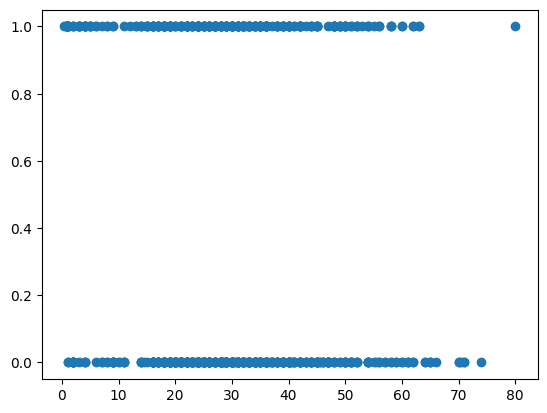

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['survived'])

In [12]:
df.describe()

,survived,age,who_child,who_man,who_woman
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,29.699118,0.116246,0.578431,0.305322
std,0.491460,14.526497,0.320745,0.494156,0.460867
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,1.000000,0.000000
75%,1.000000,38.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000


In [13]:
#Seperate data into Input & output
X = df.drop('survived', axis=1)
X[:5]

,age,who_child,who_man,who_woman
0,22.0,0,1,0
1,38.0,0,0,1
2,26.0,0,0,1
3,35.0,0,0,1
4,35.0,0,1,0


In [14]:
y = df.survived
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [15]:
#Splitting Data

from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,stratify=y)

In [17]:
import warnings
warnings.filterwarnings('ignore') #to ignore warnings while model.fit
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression ()
model

LogisticRegression()

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
#Testing
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 1, 0, 1, 0])

In [21]:
y_test[:5].values

array([1, 1, 0, 0, 0])

In [22]:
#Performance measures/metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [23]:
#Calculate the accuracy
accuracy_score(y_test, y_pred)*100

76.74418604651163

In [25]:
model.score(X_test, y_test)

0.7674418604651163

In [26]:
#Confusion Matrix for (mis-classification) only
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,  27],
       [ 23,  64]])

In [27]:
#Check in y_test
y_test
sum(y_test == 0)

128

In [28]:
#Check in y_test
y_pred
sum(y_pred == 0)

124

In [34]:
cm

array([[101,  27],
       [ 23,  64]])

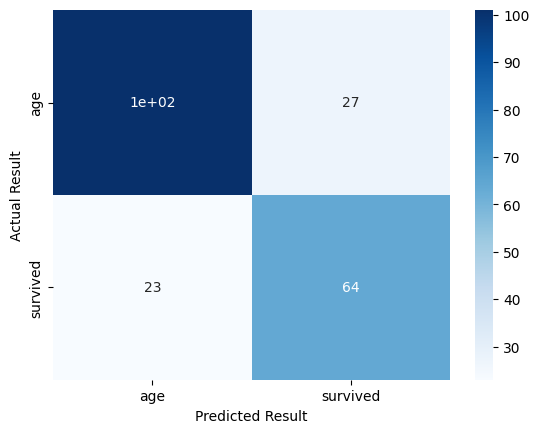

In [35]:
import seaborn as sns
sns.heatmap(cm,annot=True, xticklabels = ['age','survived'],yticklabels = ['age','survived'],cmap='Blues')
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.show()

In [30]:
from sklearn.metrics import classification_report #All in one

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       128
           1       0.70      0.74      0.72        87

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215

